# <center> Logistic Regression Prediction model <center>

# How severe can an airplane accident be?

## Problem
Flying has been the go-to mode of travel for years now; it is time-saving, affordable, and extremely convenient. According to the FAA, 2,781,971 passengers fly every day in the US, as in June 2019. Passengers reckon that flying is very safe, considering strict inspections are conducted and security measures are taken to avoid and/or mitigate any mishappenings. However, there remain a few chances of unfortunate incidents.

Imagine you have been hired by a leading airline. You are required to build Machine Learning models to anticipate and classify the severity of any airplane accident based on past incidents. With this, all airlines, even the entire aviation industry, can predict the severity of airplane accidents caused due to various factors and, correspondingly, have a plan of action to minimize the risk associated with them.

## Data:
The dataset comprises 3 files: 

* **Train.csv :**_   [10000 x 12 excluding the headers] contains Training data
* **Test.csv :**_  [2500 x 11 excluding the headers] contains Test data
* **sample_submission.csv :**_  contains a sample of the format in which the Results.csv needs to be

## Data Description:

**Columns**||**Description**
:-||:---
Accident_ID	||unique id assigned to each row
Accident_Type_Code ||the type of accident (factor, not numeric)
Cabin_Temperature	||the last recorded temperature before the incident, measured in degrees fahrenheit
Turbulence_In_gforces	||the recorded/estimated turbulence experienced during the accident
Control_Metric	||an estimation of how much control the pilot had during the incident given the factors at play
Total_Safety_Complaints	||number of complaints from mechanics prior to the accident
Days_Since_Inspection	||how long the plane went without inspection before the incident
Safety_Score	||a measure of how safe the plane was deemed to be
Violations	||number of violations that the aircraft received during inspections
Severity	||a description (4 level factor) on the severity of the crash [Target]



## Problem
Flying has been the go-to mode of travel for years now; it is time-saving, affordable, and extremely convenient. According to the FAA, 2,781,971 passengers fly every day in the US, as in June 2019. Passengers reckon that flying is very safe, considering strict inspections are conducted and security measures are taken to avoid and/or mitigate any mishappenings. However, there remain a few chances of unfortunate incidents.

Imagine you have been hired by a leading airline. You are required to build Machine Learning models to anticipate and classify the severity of any airplane accident based on past incidents. With this, all airlines, even the entire aviation industry, can predict the severity of airplane accidents caused due to various factors and, correspondingly, have a plan of action to minimize the risk associated with them.

## Data:
The dataset comprises 3 files: 

Train.csv: [10000 x 12 excluding the headers] contains Training data
Test.csv: [2500 x 11 excluding the headers] contains Test data
sample_submission.csv: contains a sample of the format in which the Results.csv needs to be

## Data Description:

**Columns**	|| **Description**
:-||:---
Accident_ID	||unique id assigned to each row
Accident_Type_Code ||the type of accident (factor, not numeric)
Cabin_Temperature	||the last recorded temperature before the incident, measured in degrees fahrenheit
Turbulence_In_gforces	||the recorded/estimated turbulence experienced during the accident
Control_Metric	||an estimation of how much control the pilot had during the incident given the factors at play
Total_Safety_Complaints	||number of complaints from mechanics prior to the accident
Days_Since_Inspection	||how long the plane went without inspection before the incident
Safety_Score	||a measure of how safe the plane was deemed to be
Violations	||number of violations that the aircraft received during inspections
Severity	||a description (4 level factor) on the severity of the crash [Target]



In [1]:
# improting all the required liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Now loading the dataset
# Training set
train_data = pd.read_csv("C:\\Users\\HP\\Documents\\Machine learning\\Dataset\\train.csv")

# Test set
test_data = pd.read_csv("C:\\Users\\HP\\Documents\\Machine learning\\Dataset\\test.csv")


In [3]:
# First working with train set
train_data.head(10)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
5,Minor_Damage_And_Injuries,43.333333,15,0,73.336372,0.432954,78.63,2,29288.448105,1,0.394505,10947
6,Highly_Fatal_And_Damaging,22.009132,15,10,62.853236,0.314671,88.04,4,32342.109345,0,0.058872,4717
7,Minor_Damage_And_Injuries,24.703196,18,4,60.802188,0.548353,83.48,4,22547.195242,2,0.040419,8008
8,Highly_Fatal_And_Damaging,54.840183,5,40,69.234275,0.335587,78.24,2,45751.983413,0,0.619186,8179
9,Significant_Damage_And_Serious_Injuries,52.237443,6,4,57.429353,0.465410,79.56,1,37933.399001,1,1.389295,6324


In [4]:
(train_data.shape)

(10000, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 898.5+ KB


In [6]:
train_data.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [7]:
train_data["Severity"].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [8]:
train_data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [9]:
train_data.corr()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Safety_Score,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047
Adverse_Weather_Metric,-0.107925,0.040804,-0.002713,-0.028296,0.039802,-0.026647,-0.739361,0.173436,-0.021578,1.000000,0.008586


<AxesSubplot:>

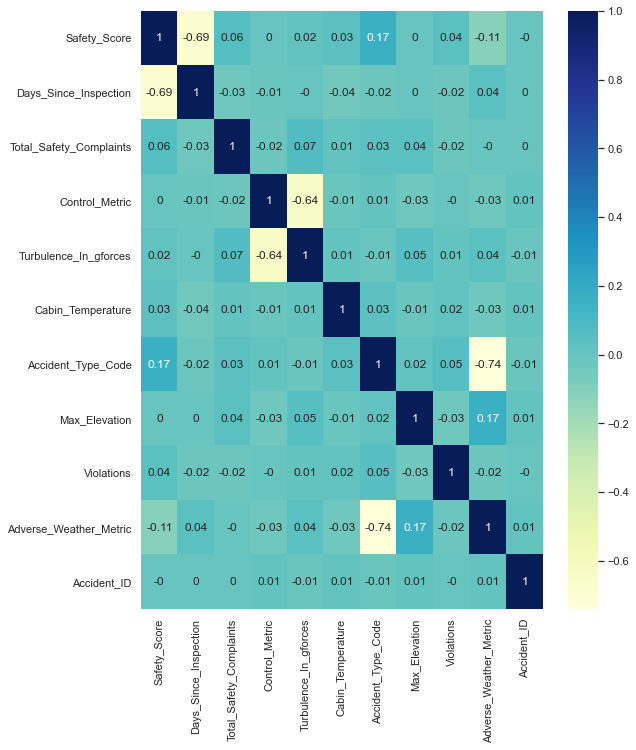

In [10]:
sns.set(rc = {"figure.figsize":(9,11)})
coor_matrix = train_data.corr().round(2)
sns.heatmap(data = coor_matrix, annot = True, cmap = "YlGnBu")

In [11]:
# Selceting the feature variable(x) and target variable(y)
X = train_data.drop("Severity", axis=1)
print("x size :", X.shape)
y = train_data["Severity"].values
print("y size :", y.shape)

x size : (10000, 11)
y size : (10000,)


In [12]:
# spliting the dataset inot train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
# Standrizing the feature set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
# fitting the dataset
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [15]:
print("Accuracy :", lr.score(x_test, y_test))

Accuracy : 0.6445


In [16]:
y_pred = lr.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[505,  88,  21,   6],
       [  1, 326,  56, 110],
       [128,  72,  77,  35],
       [ 61,  73,  60, 381]], dtype=int64)

<AxesSubplot:>

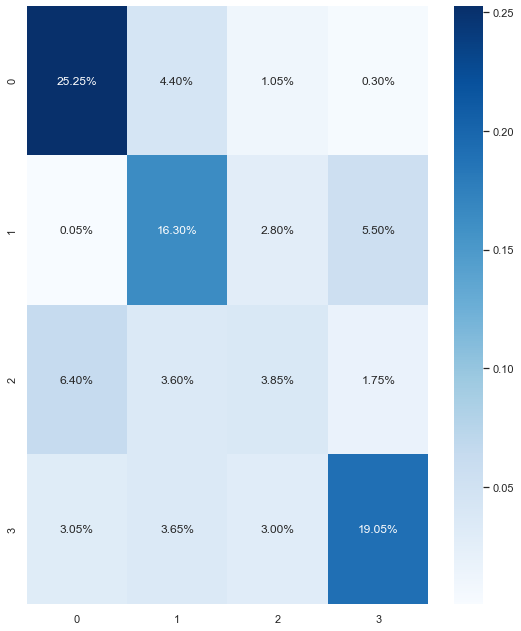

In [18]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [19]:
# the prediction for test.csv (Actual output)
test_predictions = lr.predict(test_data)
test_predictions

array(['Significant_Damage_And_Serious_Injuries',
       'Significant_Damage_And_Serious_Injuries',
       'Significant_Damage_And_Serious_Injuries', ...,
       'Significant_Damage_And_Serious_Injuries',
       'Significant_Damage_And_Serious_Injuries',
       'Significant_Damage_And_Serious_Injuries'], dtype=object)

In [20]:
Accident_ID = test_data['Accident_ID']
submission_df_1 = pd.DataFrame({"Accident_ID": Accident_ID,  "Severity": test_predictions})
submission_df_1.Severity.value_counts()

Significant_Damage_And_Serious_Injuries    2490
Minor_Damage_And_Injuries                     7
Highly_Fatal_And_Damaging                     3
Name: Severity, dtype: int64

In [21]:
submission_df_1.to_csv('predictions.csv', index=False)